# Decision Tree Regression

In [129]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/''python-machine-learning-book-2nd-edition''/master/code/ch10/housing.data.txt',header=None,sep='\s+')
df.columns =['CRIM', 'ZN', 'INDUS', 'CHAS', 
            'NOX', 'RM','AGE','DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
             'LSTAT', 'MEDV' ]

In [130]:
from sklearn.tree import DecisionTreeRegressor

In [131]:
X = df[['LSTAT']].values
y = df['MEDV'].values

In [132]:
tree = DecisionTreeRegressor(max_depth=3)

In [133]:
tree.fit(X,y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [134]:
sort_idx = X.flatten().argsort()
sort_idx

array([161, 162,  40, 232, 192, 204,   3, 370, 195, 275, 282, 202, 256,
       226, 268, 283, 368, 163, 290, 274, 252, 253, 291,  98, 251, 166,
       369, 229, 280, 203, 228, 233,  57,   2, 196, 224, 277,  97,  39,
       194, 200, 186, 353, 308, 199, 188, 157, 281, 344, 225,  65, 191,
       292, 237, 299,  55, 182,  41, 279, 303, 298,   0, 193, 179, 325,
       190, 257, 243,   5, 231,  52, 364,  80,   4, 175, 189, 341, 351,
       160,  88,  72, 355, 503, 333, 183,  89,  56,  42, 349, 250, 262,
       311, 350, 348, 276, 300, 324, 326,  99,  93, 295, 177, 238, 347,
       227, 158, 306, 504,  85, 249, 254, 273,  16, 271, 198,  95, 187,
        70,  82,  62, 334,  74,  58, 321, 259, 178, 304, 482, 365, 287,
       343, 278, 320,  81, 261, 329, 239, 296, 159, 201,  43, 267,  83,
       307,  73, 180, 288, 223, 101, 322, 272, 481, 360, 258, 352, 332,
       284, 505, 313, 335,  64, 354, 234,  67, 264,  92,  91, 285,  13,
        53,  87,  15, 338, 293, 197, 342, 302,  37,  69,  90, 37

In [135]:
import matplotlib.pyplot as plt
import numpy as np

def lin_reg_plot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color ='black', lw=2)
    plt.xlabel("Number of Rooms(RM)")
    plt.ylabel('House Prices(MEDV)')
    return None

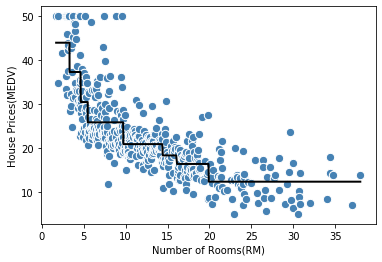

In [136]:
lin_reg_plot(X[sort_idx], y[sort_idx], tree)

# Random Forest Regression

In [137]:
X = df.iloc[:, :-1].values
y =df['MEDV'].values
print(X.shape)
print(y.shape)

(506, 13)
(506,)


In [138]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.4, random_state =1)

In [140]:
from sklearn.ensemble import RandomForestRegressor

In [141]:
forest = RandomForestRegressor(n_estimators=1000, criterion='mse', random_state=1, n_jobs= -1)



In [142]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=1, verbose=0, warm_start=False)

In [143]:
y_train_pred = forest.predict(X_train)

In [144]:
y_test_pred = forest.predict(X_test)

In [145]:
from sklearn.metrics import r2_score

In [146]:
print(r2_score(y_train, y_train_pred))

0.9794899516412922


In [147]:
print(r2_score(y_test, y_test_pred))

0.8775836858654067
